<a href="https://colab.research.google.com/github/Juribe7980/Project-1-Part-1/blob/main/Project_1_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Salary Insights
Jessica Uribe

PROJECT Part 1 & 2

Project-Part 1
This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!


Project- Part 2
our task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

Download the data using this link: download the data. (Note: Original data source).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Here are a few resources to help you consider more advanced ways to deal with missing values in your dataset (check out the optional additional Pandas resources at the end of this Chapter for more resources on this):
Missing Data, its types, and statistical methods to deal with it.



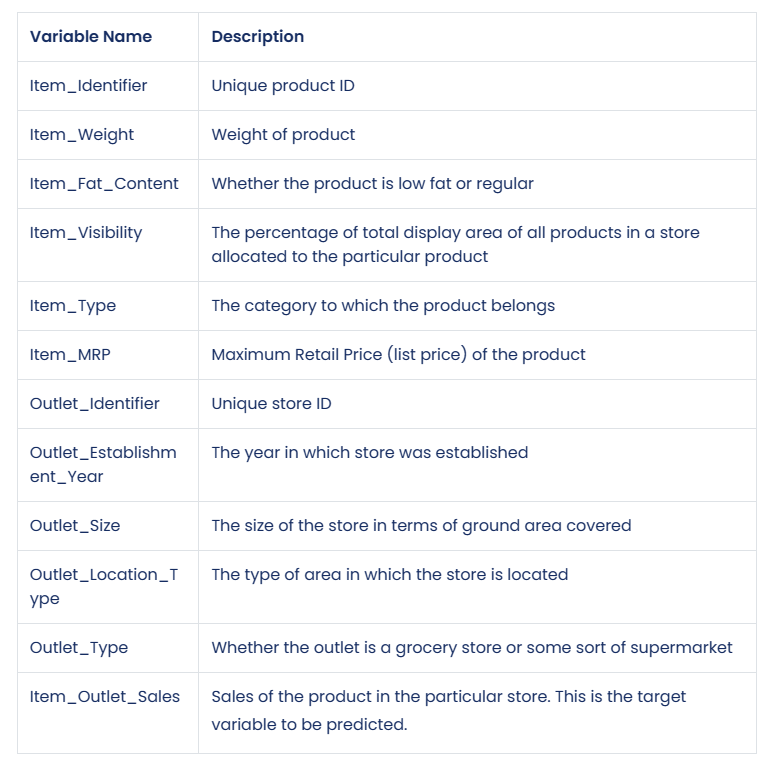

Import Data

In [70]:
import pandas as pd
import numpy as np

Loading Data

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [74]:
Sales.shape

(8523, 12)

There are 8523 rows and 12 columns.

2) What are the datatypes of each variable?

In [76]:
Sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Here are the data types of each variable.

3) Are there duplicates? If so, drop any duplicates.

In [78]:
Sales.duplicated().sum()

0

There are no duplicates in this dataset.

4) Identify missing values.

In [83]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing data (optional)

In [84]:
df.isna().sum() / len(df) * 100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Missing Values:

-There are 1456 missing values in the Item Weight column. (17.17%)
-There are 2410 missing values in the Outlet Size column. (28.27%)
In order to make informed decisions about how to handle missing data, we will 

do some additional EDA.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [86]:
Sales['Item_Weight'].fillna(value =  Sales['Item_Weight'].mean(),inplace = True)
Sales['Outlet_Size'].fillna(value = 'Medium', inplace = True)

6) Confirm that there are no missing values after addressing them.

In [87]:
Sales.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [88]:
Sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [89]:
Sales['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat', inplace=True)
Sales['Item_Fat_Content'].replace(['reg'], 'Regular', inplace=True)

In [90]:
Sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [91]:
Sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [92]:
Sales['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [93]:
Sales['Outlet_Size'].replace(['High'], 'Large', inplace=True)

In [94]:
Sales['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [95]:
Sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [96]:
Sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [98]:
print(Sales['Item_Weight'].min())
print(Sales['Item_Visibility'].min())
print(Sales['Item_MRP'].min())
print(Sales['Item_Outlet_Sales'].min())
print(Sales['Outlet_Establishment_Year'].min())

4.555
0.0
31.29
33.29
1985


In [99]:
print(Sales['Item_Weight'].max())
print(Sales['Item_Visibility'].max())
print(Sales['Item_MRP'].max())
print(Sales['Item_Outlet_Sales'].max())
print(Sales['Outlet_Establishment_Year'].max())

21.35
0.328390948
266.8884
13086.9648
2009


In [100]:
print(Sales['Item_Weight'].mean())
print(Sales['Item_Visibility'].mean())
print(Sales['Item_MRP'].mean())
print(Sales['Item_Outlet_Sales'].mean())
print(Sales['Outlet_Establishment_Year'].mean())

12.857645184135976
0.06613202877895108
140.9927819781767
2181.288913575032
1997.8318667135984


PART 3

Our task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [108]:
#For each numeric feature, we will plot the distribution and a boxplot.
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [109]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

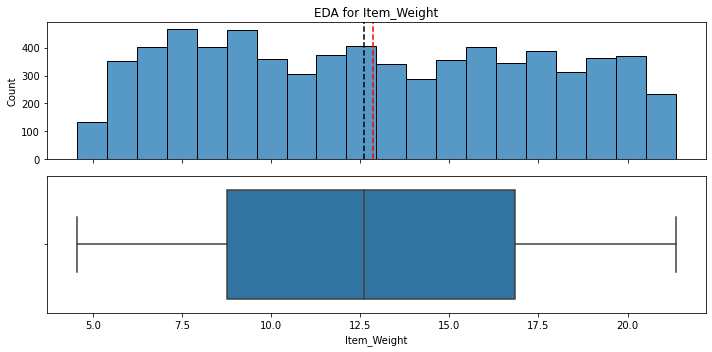

In [110]:
plot_numeric(df,'Item_Weight');

In [118]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 45)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 10, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


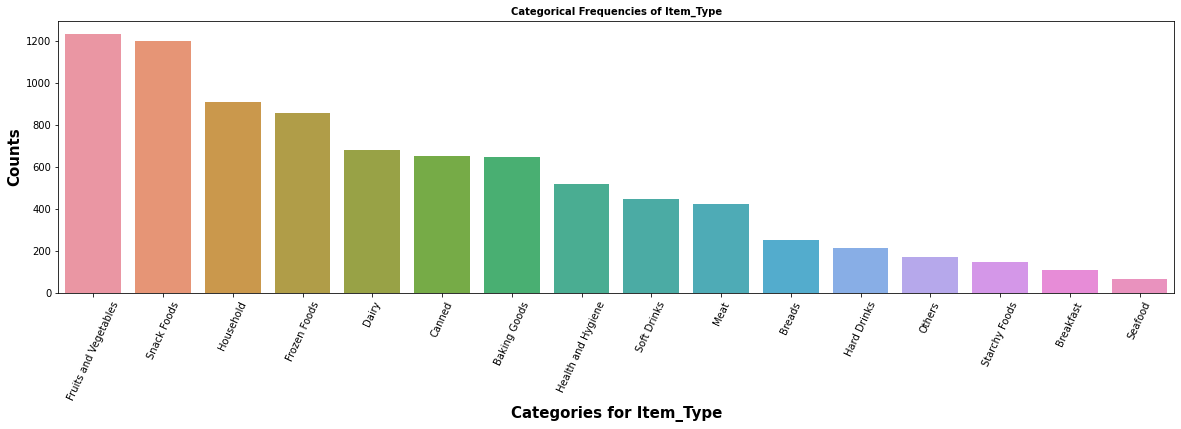

In [123]:
fig, ax = plot_bar(df, 'Item_Type', 'Item_Type');
print(df['Item_Type'].value_counts())

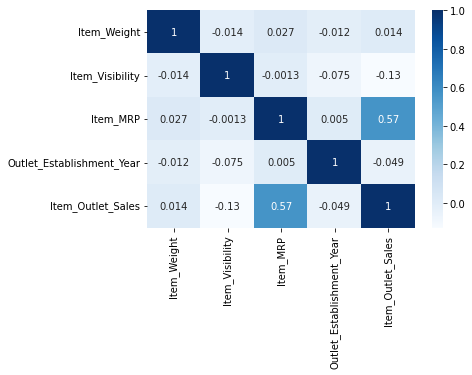

In [124]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

PART 4

Your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.